In [400]:
import pandas as pd
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', 255)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [401]:
df_meta = pd.read_pickle(r'C:\Users\tay5bu\Desktop\Python_20\PredictiveMaintenance_2\AOI.pkl')

In [402]:
df_meta = df_meta[df_meta['label'] != 4 ]
df_meta = df_meta[df_meta['label'] != 5 ]

In [404]:
df_special = df_meta[df_meta['label'] != 0 ]

import plotly.express as px
fig = px.line(df_meta, x="time", y="value", color="label")
fig.show()

In [405]:
df_meta = df_meta.drop(columns=['type_no','step','unit','machine','parameter','axis','id'])

In [406]:
df_meta = df_meta.drop(columns=[])

In [407]:
df_meta['start_date'] = pd.to_datetime(df_meta['start_date'])

In [409]:
df_meta.dtypes

device_nr              int64
value                float64
time                  object
start_date    datetime64[ns]
label                  int64
AOI                   object
dtype: object

In [410]:
df_meta = df_meta.sort_values(by = ['start_date'], ignore_index=True)

In [412]:
df = df_meta

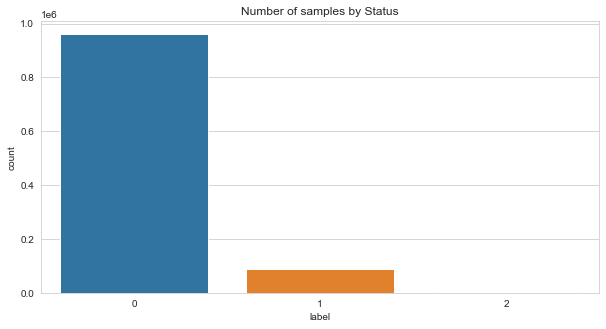

In [413]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'label', data = df)
plt.title('Number of samples by Status')
plt.show()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

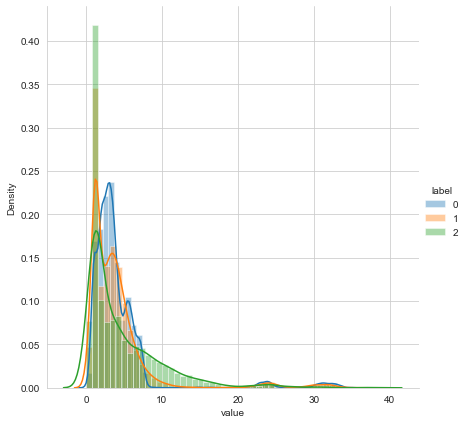

In [414]:
sns.FacetGrid(df, hue = 'label', size = 6).map(sns.distplot, 'value').add_legend()

In [415]:
df_AOI = df[df['AOI'] =='deneme']

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

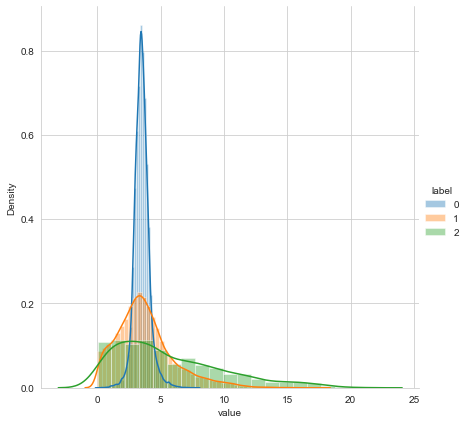

In [416]:
sns.FacetGrid(df_AOI, hue = 'label', size = 6).map(sns.distplot, 'value').add_legend()

In [417]:
df_AOI = df_AOI.drop(columns=['device_nr','time'])

In [420]:
date_list = df_AOI.start_date.unique()

In [421]:
df_features = pd.DataFrame()
counter = 0 
for i in range(len(date_list)):
    df_date_sliced = df_AOI[df_AOI['start_date'] == date_list[i]]
    len_sliced = len(df_date_sliced)
    df_first = df_date_sliced.iloc[:int(len_sliced/2)]
    df_second = df_date_sliced.iloc[int(len_sliced/2)+1:]
    
    #Get Label for Each
    df_features.at[counter, 'label'] = str(df_first['label'].mean())
    df_features.at[counter+1, 'label'] = str(df_second['label'].mean())
    # mean
    df_features.at[counter, 'mean'] = df_first['value'].mean()
    df_features.at[counter+1, 'mean'] = df_second['value'].mean()
    # std dev
    df_features.at[counter, 'std-dev'] = df_first['value'].std()
    df_features.at[counter+1, 'std-dev'] = df_second['value'].std()
    # avg absolute diff np.mean(np.absolute(x - np.mean(x) Mean Absolute Deviation
    df_features.at[counter, 'mad'] = df_first['value'].mad()
    df_features.at[counter+1, 'mad'] = df_second['value'].mad()
    # min
    df_features.at[counter, 'min'] = df_first['value'].min()
    df_features.at[counter+1, 'min'] = df_second['value'].min()
    # max
    df_features.at[counter, 'max'] = df_first['value'].max()
    df_features.at[counter+1, 'max'] = df_second['value'].max()
    # max-min diff
    df_features['min-max_diff'] = df_features['max'] - df_features['min']
    # median
    df_features.at[counter, 'median'] = df_first['value'].median()
    df_features.at[counter+1, 'median'] = df_second['value'].median()
    # median abs dev 
    df_features.at[counter, 'median_abs_dev'] = stats.median_abs_deviation(df_first['value'])
    df_features.at[counter+1, 'median_abs_dev'] =stats.median_abs_deviation(df_second['value'])
    # interquartile range
    df_features.at[counter, 'IQR'] = df_first['value'].quantile(0.75) - df_first['value'].quantile(0.25) 
    df_features.at[counter+1, 'IQR'] = df_second['value'].quantile(0.75) - df_second['value'].quantile(0.25)
    # values above mean
    df_features.at[counter, 'count_above_mean'] = df_first['value'][df_first['value'] > df_first['value'].mean()].count()
    df_features.at[counter+1, 'count_above_mean'] = df_second['value'][df_second['value'] > df_second['value'].mean()].count()
    # number of peaks
    df_features.at[counter, 'number_of_peaks'] = find_peaks(df_first['value'])[0].shape[0]
    df_features.at[counter+1, 'number_of_peaks'] = find_peaks(df_second['value'])[0].shape[0]
    # skewness
    df_features.at[counter, 'skewness'] = df_first['value'].skew()
    df_features.at[counter+1, 'skewness'] = df_second['value'].skew()
    # kurtosis
    df_features.at[counter, 'kurtosis'] = df_first['value'].kurtosis()
    df_features.at[counter+1, 'kurtosis'] = df_second['value'].kurtosis()
    # energy df.pow(2).usm())
    df_features.at[counter, 'energy'] = df_first['value'].pow(2).sum()
    df_features.at[counter+1, 'energy'] = df_second['value'].pow(2).sum()
    counter = counter + 2

In [422]:
df_features.dtypes

label                object
mean                float64
std-dev             float64
mad                 float64
min                 float64
max                 float64
min-max_diff        float64
median              float64
median_abs_dev      float64
IQR                 float64
count_above_mean    float64
number_of_peaks     float64
skewness            float64
kurtosis            float64
energy              float64
dtype: object

In [453]:
df_features.label.value_counts()

0.0    112
1.0    110
2.0      8
Name: label, dtype: int64

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

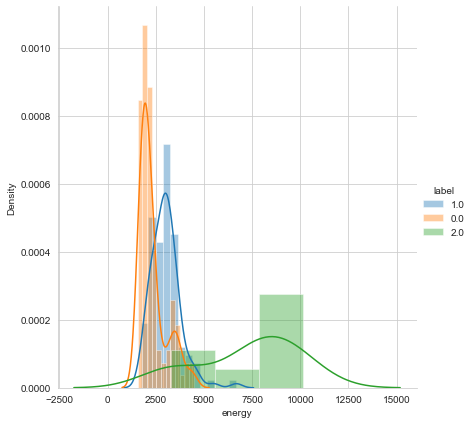

In [452]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'energy').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

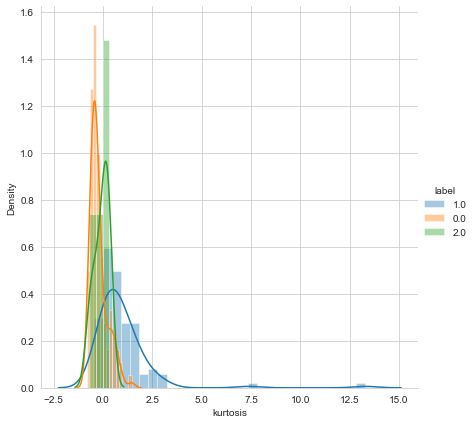

In [425]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'kurtosis').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

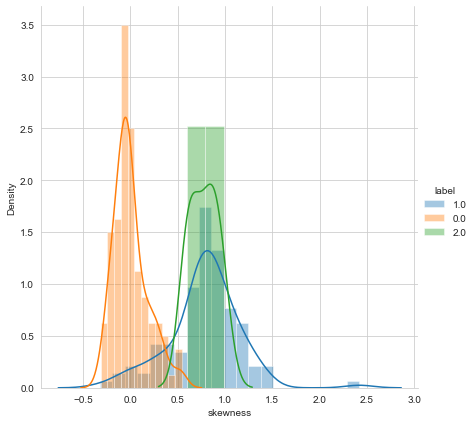

In [426]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'skewness').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

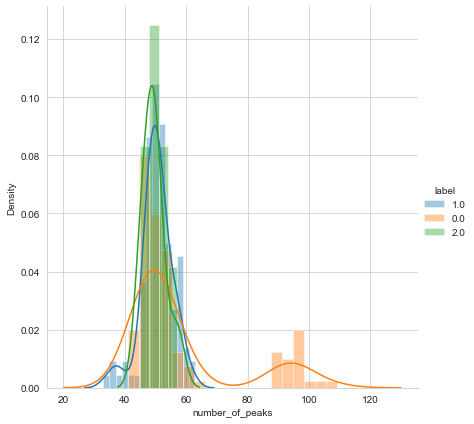

In [427]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'number_of_peaks').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

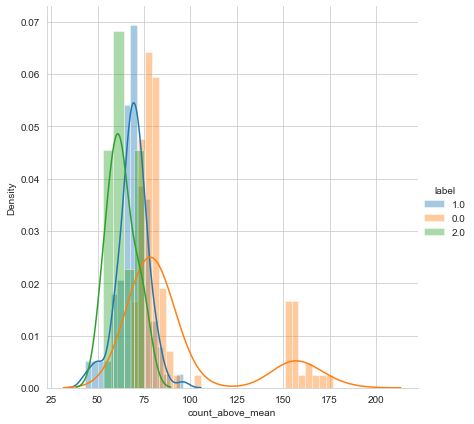

In [428]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'count_above_mean').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

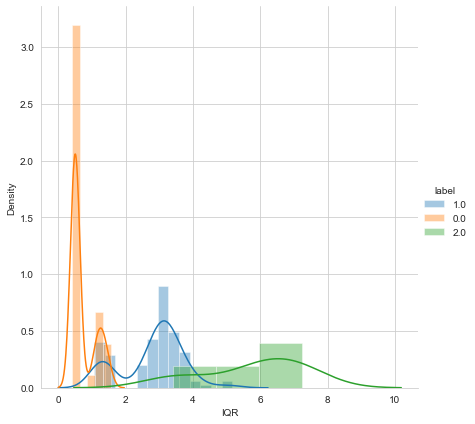

In [429]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'IQR').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

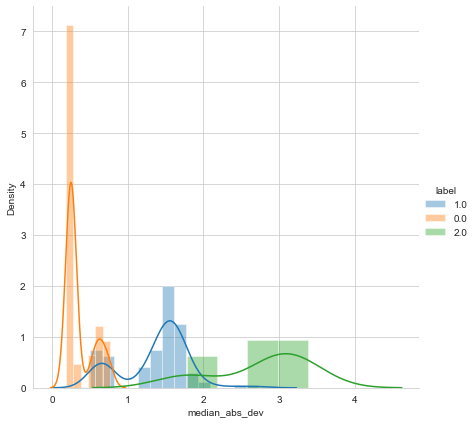

In [430]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'median_abs_dev').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

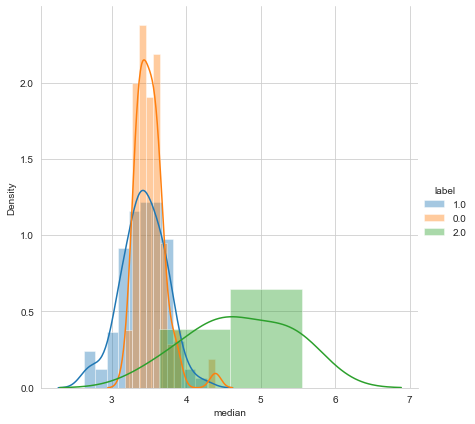

In [431]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'median').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

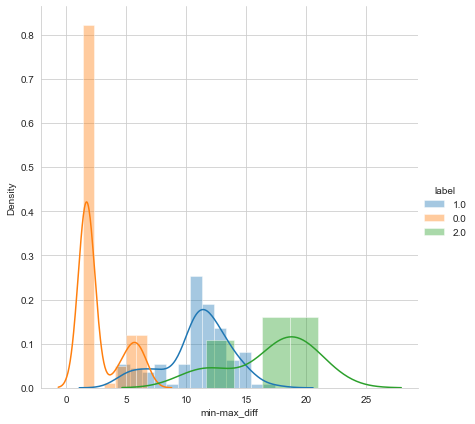

In [432]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'min-max_diff').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

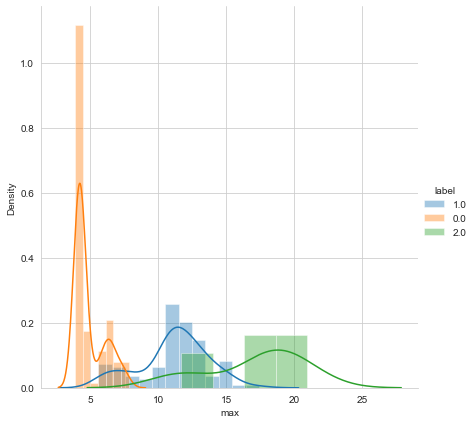

In [433]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'max').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

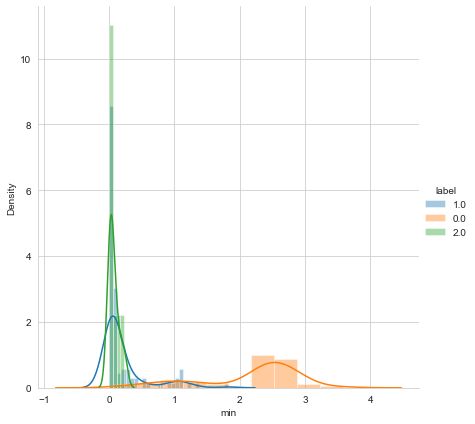

In [434]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'min').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

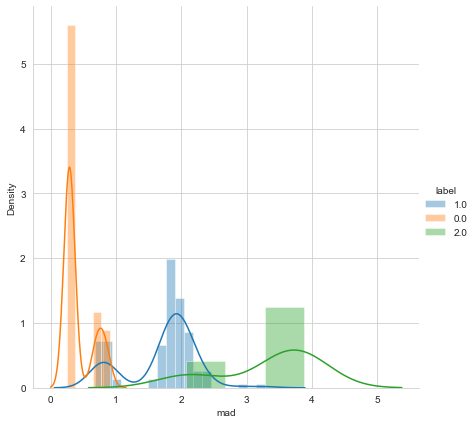

In [435]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'mad').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

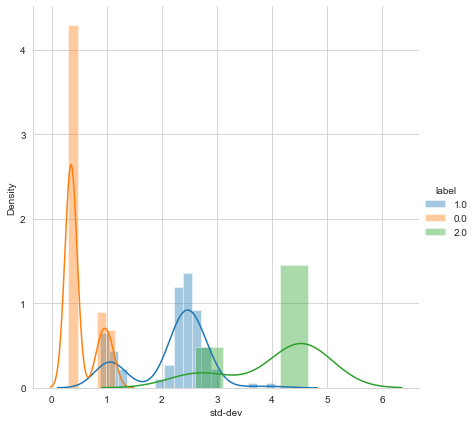

In [436]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'std-dev').add_legend()

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\seaborn\dist

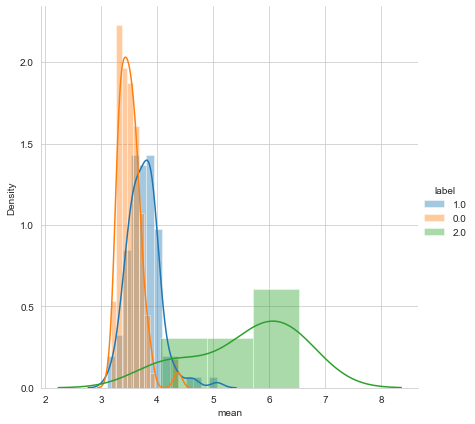

In [437]:
sns.FacetGrid(df_features, hue = 'label', size = 6).map(sns.distplot, 'mean').add_legend()

In [439]:
df_features.label.value_counts()

0.0    112
1.0    110
2.0      8
Name: label, dtype: int64

In [440]:
X = df_features.loc[:, df_features.columns != 'label']
y = df_features.loc[:, df_features.columns == 'label']

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)


In [442]:
y.value_counts(),y_test.value_counts(), y_train.value_counts()

(label
 0.0      112
 1.0      110
 2.0        8
 dtype: int64,
 label
 0.0      34
 1.0      33
 2.0       2
 dtype: int64,
 label
 0.0      78
 1.0      77
 2.0       6
 dtype: int64)

In [443]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report# standardization

'''
scaler = StandardScaler()
scaler.fit(X_train)

X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)# logistic regression model
'''
lr = LogisticRegression(random_state = 21)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9130434782608695

 -------------Classification Report-------------

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        34
         1.0       0.94      0.88      0.91        33
         2.0       1.00      1.00      1.00         2

    accuracy                           0.91        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.91      0.91      0.91        69



C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



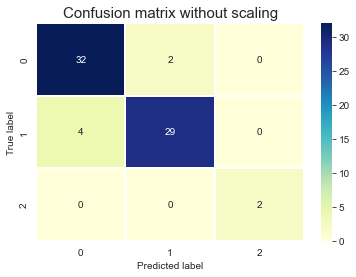

In [444]:
labels = [0, 1, 2]
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix without scaling', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

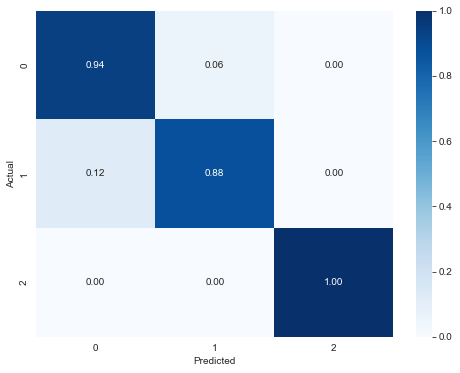

In [450]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)